In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Analizar los archivos y crear un dataframe para cada uno de los archivos.

In [3]:
df_fecha = pd.read_excel(
    'C:/Users/monts/Downloads/airTribu.xlsx',
    sheet_name='airTribu',
    usecols='A:B',
    header=2
)
df_fecha.reset_index(drop=True, inplace=True)
df_fecha


,vuelo,día
0,6005,2
1,2021,25
2,5528,18
3,7965,25
4,8717,13
...,...,...
95,5401,20
96,7050,24
97,1448,22
98,6970,22


In [4]:
df_paises = pd.read_excel(
    'C:/Users/monts/Downloads/airTribu.xlsx',
    sheet_name='airTribu',
    usecols='D:E',
    header= 2
)

df_paises

,COD_país,país
0,ARG,Argentina
1,AUS,Australia
2,BRA,Brasil
3,CAN,Canada
4,CHI,Chile
...,...,...
95,NaN,NaN
96,NaN,NaN
97,NaN,NaN
98,NaN,NaN


In [5]:
df_vuelos = pd.read_excel(
    'C:/Users/monts/Downloads/airTribu.xlsx',
    sheet_name='airTribu',
    usecols='G:I',
    header= 2
)

df_vuelos

,vuelo.1,origen,destino
0,6005,MEX,ESP
1,2021,COL,MEX
2,5528,ARG,COL
3,7965,BRA,ARG
4,8717,USA,BRA
...,...,...,...
95,5401,CAN,USA
96,7050,CHI,VEN
97,1448,CHN,USA
98,6970,COL,IND


In [6]:
df_retrasos = pd.read_excel(
    'C:/Users/monts/Downloads/airTribu.xlsx',
    sheet_name='airTribu',
    usecols='K:L',
    header= 2
)

df_retrasos

,vuelo.2,retraso
0,6005,52
1,2021,27
2,5528,36
3,7965,82
4,8717,29
...,...,...
95,5401,58
96,7050,68
97,1448,53
98,6970,79


# 2. Análisis Básico con Spark, necesitamos responder a cuatro preguntas clave sobre las operaciones :

## ¿Cuál fue el pais que registro el mayor número de despegues?

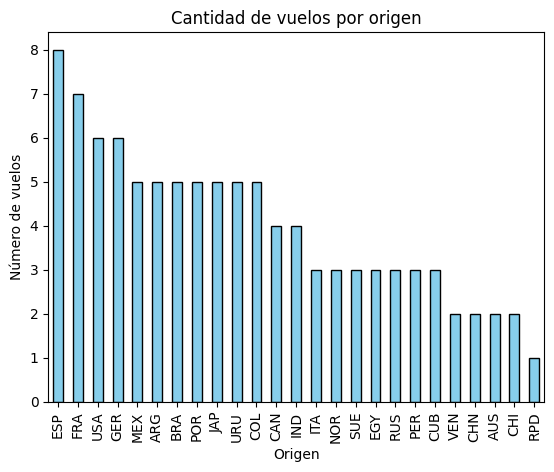

origen 
ESP    8
FRA    7
USA    6
GER    6
MEX    5
ARG    5
BRA    5
POR    5
JAP    5
URU    5
COL    5
CAN    4
IND    4
ITA    3
NOR    3
SUE    3
EGY    3
RUS    3
PER    3
CUB    3
VEN    2
CHN    2
AUS    2
CHI    2
RPD    1
Name: count, dtype: int64


In [9]:
df_vuelos_copia = df_vuelos[['vuelo.1', 'origen ']].copy()

conteo_vuelos = df_vuelos_copia['origen '].value_counts()

conteo_vuelos.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Cantidad de vuelos por origen')
plt.xlabel('Origen')
plt.ylabel('Número de vuelos')

plt.show()
print(conteo_vuelos)

## El país que registro mayor cantidad de despegues fue españa con 8 vuelos

# ¿Cuál fue el país que recibió la mayor cantidad de aterrizajes?

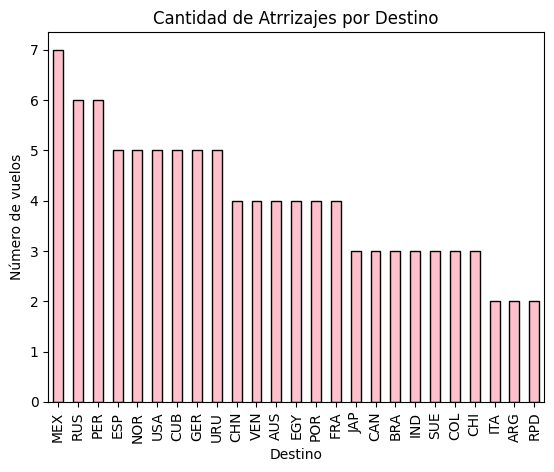

destino
MEX    7
RUS    6
PER    6
ESP    5
NOR    5
USA    5
CUB    5
GER    5
URU    5
CHN    4
VEN    4
AUS    4
EGY    4
POR    4
FRA    4
JAP    3
CAN    3
BRA    3
IND    3
SUE    3
COL    3
CHI    3
ITA    2
ARG    2
RPD    2
Name: count, dtype: int64


In [12]:
df_aterrizajes_copia = df_vuelos[['origen ','destino']].copy()

conteo_aterrizajes= df_aterrizajes_copia['destino'].value_counts()

conteo_aterrizajes.plot(kind='bar', color='pink', edgecolor='black')

plt.title('Cantidad de Atrrizajes por Destino')
plt.xlabel('Destino')
plt.ylabel('Número de vuelos')

plt.show()
print(conteo_aterrizajes)

## El país que registro mayor cantidad de aterrizajes fue México con 7 descensos


# Identificar el día del mes con mayor actividad de vuelos y el día con menor actividad

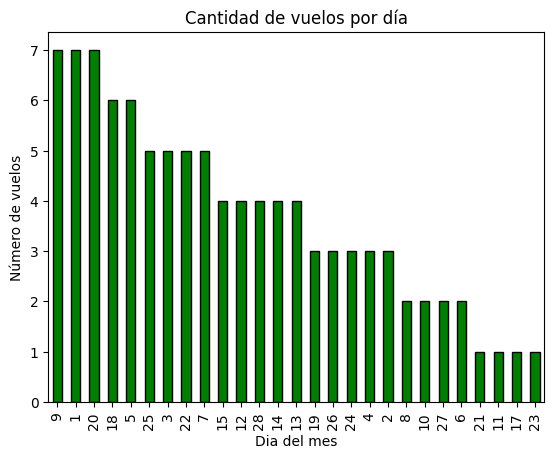

día
9     7
1     7
20    7
18    6
5     6
25    5
3     5
22    5
7     5
15    4
12    4
28    4
14    4
13    4
19    3
26    3
24    3
4     3
2     3
8     2
10    2
27    2
6     2
21    1
11    1
17    1
23    1
Name: count, dtype: int64


In [15]:
df_fecha_copia = df_fecha[['vuelo', 'día']].copy()

conteo_fechas = df_fecha_copia['día'].value_counts()

conteo_fechas.plot(kind='bar', color='green', edgecolor='black')

plt.title('Cantidad de vuelos por día')
plt.xlabel('Dia del mes')
plt.ylabel('Número de vuelos')

plt.show()
print(conteo_fechas)

## Los días que registraron más vuelso en el mes de febrero del 2019, fueron el día 1, 9 y 20. Mientras que los días 11,17,23 y 21 solo tuvieron 1 vuelo al día 

# Identificar el día del mes con mayor cantidad de retrasos y cual el menor

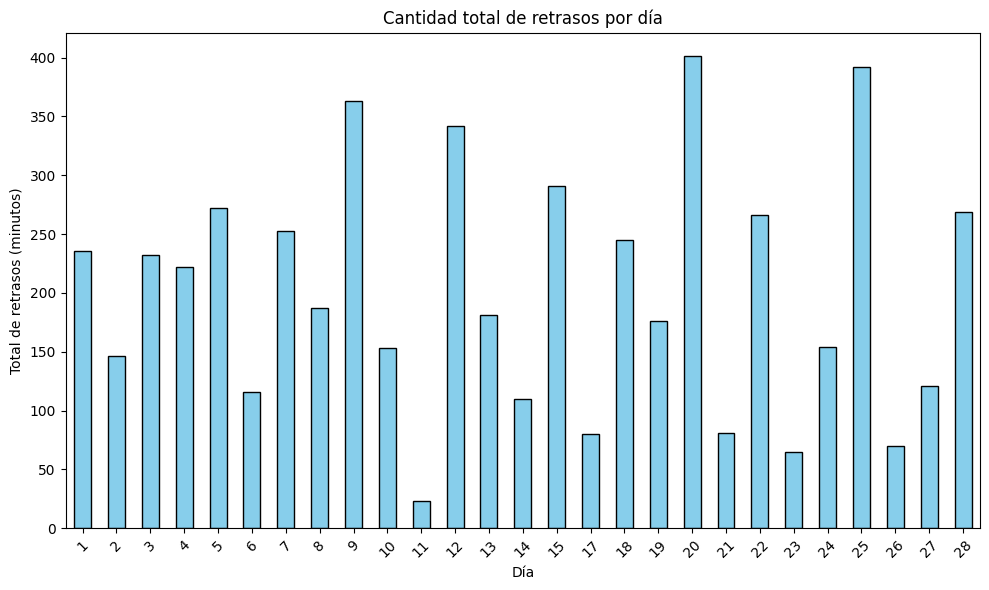

día
1     236
2     146
3     232
4     222
5     272
6     116
7     253
8     187
9     363
10    153
11     23
12    342
13    181
14    110
15    291
17     80
18    245
19    176
20    401
21     81
22    266
23     65
24    154
25    392
26     70
27    121
28    269
Name: retraso, dtype: int64


In [23]:
df_retrasos.rename(columns={'vuelo.2': 'vuelo'}, inplace=True)
df_retrasos_copia = df_retrasos[['vuelo', 'retraso']].copy()

df_combinado = pd.merge(df_fecha_copia, df_retrasos_copia, on='vuelo', how='inner')
retrasos_por_dia = df_combinado.groupby('día')['retraso'].sum()

plt.figure(figsize=(10, 6))
retrasos_por_dia.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cantidad total de retrasos por día')
plt.xlabel('Día')
plt.ylabel('Total de retrasos (minutos)')

plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

print(retrasos_por_dia)     



## El día con mayor tiempo de retraso fue el día 20 con 401, mientras que el día con menor retraso fue el 11 con 23

# Se requiere crear un nuevo DataFrame que se centre en el análisis de retrasos.

In [63]:
df_vuelos.rename(columns={'vuelo.1': 'vuelo'}, inplace=True)
df_vuelos.rename(columns={'origen ': 'origen'}, inplace=True)
df_fecha.rename(columns={'día': 'dia'}, inplace=True)

df_totalret = df_vuelos.merge(df_retrasos, how = 'inner', on = 'vuelo').merge(df_fecha, how = 'inner', on= 'vuelo')


df_totalret = df_totalret[["origen", "dia","retraso"]]
df_totalret.columns = ["origen", "dia","retraso"]

df_totalret = df_totalret.sort_values(by= ["origen","dia"])

df_totalret["retraso acumulado"] = df_totalret.groupby("origen")["retraso"].cumsum()

# Configuración para mostrar todas las filas
pd.set_option('display.max_rows', None)

df_totalret

,origen,dia,retraso,retraso acumulado
13,ARG,9,71,71
20,ARG,17,80,151
2,ARG,18,36,187
98,ARG,19,90,277
35,ARG,25,60,337
48,AUS,21,81,81
99,AUS,26,19,100
14,BRA,7,51,51
21,BRA,9,74,125
100,BRA,9,48,173


# 4. Crear un dataframe con los valores de origen, destino y país, añade otra columna que sea “Pais_VIP” 

In [86]:
VIP = ['ESP','PER','MEX']
df_vip = df_vuelos.copy()

df_vip["VIP"]= df_vip.apply(
    lambda row : "VIP" if row["origen"] in VIP or row["destino"] in VIP else '---', axis = 1
)

df_vip 


,vuelo,origen,destino,VIP
0,6005,MEX,ESP,VIP
1,2021,COL,MEX,VIP
2,5528,ARG,COL,---
3,7965,BRA,ARG,---
4,8717,USA,BRA,---
5,6549,FRA,USA,---
6,7566,POR,FRA,---
7,2886,CAN,POR,---
8,3122,JAP,CAN,---
9,2947,ESP,JAP,VIP


# 5. Si se desea almacenar la información del resultado del ejercicio 4 en solo 1 archivo, ¿cómo lo harías? 
¿Y si ahora lo quisiera en 10? 

In [90]:
from IPython.display import FileLink

df_vip.to_excel('df_vip.xlsx', index=False)
FileLink(r'df_vip.xlsx')

C:\Users\monts\df_vip.xlsx

In [95]:

for i in range(10):
    file_name = f"df_vip{i}.xlsx"
    df_vip.to_excel(file_name, index=False)
    display(FileLink(file_name))

C:\Users\monts\df_vip0.xlsx

C:\Users\monts\df_vip1.xlsx

C:\Users\monts\df_vip2.xlsx

C:\Users\monts\df_vip3.xlsx

C:\Users\monts\df_vip4.xlsx

C:\Users\monts\df_vip5.xlsx

C:\Users\monts\df_vip6.xlsx

C:\Users\monts\df_vip7.xlsx

C:\Users\monts\df_vip8.xlsx

C:\Users\monts\df_vip9.xlsx

# 6. Se requiere un proceso específico de filtrado y almacenamiento

In [102]:
FIL = ['MEX', 'PER']
df_fil = df_vuelos.copy()

df_fil["FIL"] = df_fil.apply(
    lambda row : "FILL" if row["origen"] in FIL else "Null", axis = 1
)

df_fil = df_fil[df_fil["FIL"]== "FIL"]

df_fil


,vuelo,origen,destino,FIL


In [98]:
df_vuelos.columns


Index(['vuelo', 'origen', 'destino'], dtype='object')